## Datasets Preprocessing Description
### Data Source and Selection:
#### The dataset selected for this study was derived from the "TON_IoT dataset" available at https://research.unsw.edu.au/projects/toniot-datasets. Specifically, the "IoT_Weather" dataset from the "Processed_IoT_dataset" category and the entire "Processed_Network_dataset" were used. The "IoT_Weather" dataset contains sensor data and the "Processed_Network_dataset" contains network traffic data.

### New Dataset Generation:
#### A comprehensive dataset was built by integrating "IoT_Weather" and "Processed_Network_dataset". The integration was performed based on two main attributes: timestamp and attack type. The purpose of performing this merge is to correlate sensor data from IoT devices with the corresponding network traffic, thus providing a holistic view of the IoT environment.

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import seaborn as sb
import os
import warnings
warnings.simplefilter('ignore')

In [55]:
# Read IoT Weather dataset
df_weather = pd.read_csv('E:/MCS/Master Project/Dataset/Processed_IoT_dataset/IoT_Weather.csv')
df_weather

,date,time,temperature,pressure,humidity,label,type
0,31-Mar-19,12:36:52,31.788508,1.035000,32.036579,0,normal
1,31-Mar-19,12:36:53,41.630997,1.035000,30.886165,0,normal
2,31-Mar-19,12:36:54,42.256959,1.035000,19.755908,0,normal
3,31-Mar-19,12:36:55,49.116581,1.035000,78.949621,0,normal
4,31-Mar-19,12:36:56,24.017085,1.035000,40.001059,0,normal
...,...,...,...,...,...,...,...
650237,27-Apr-19,12:41:17,40.384291,9.049059,93.094490,0,normal
650238,27-Apr-19,12:41:18,47.240113,-5.782022,28.146511,0,normal
650239,27-Apr-19,12:41:18,23.540606,0.913648,30.478316,0,normal
650240,27-Apr-19,12:41:18,46.016150,3.493588,73.328413,0,normal


In [56]:
df_weather['date'] = pd.to_datetime(df_weather['date'] + ' ' + df_weather['time'])
df_weather.drop('time', axis=1, inplace=True)
df_weather

,date,temperature,pressure,humidity,label,type
0,2019-03-31 12:36:52,31.788508,1.035000,32.036579,0,normal
1,2019-03-31 12:36:53,41.630997,1.035000,30.886165,0,normal
2,2019-03-31 12:36:54,42.256959,1.035000,19.755908,0,normal
3,2019-03-31 12:36:55,49.116581,1.035000,78.949621,0,normal
4,2019-03-31 12:36:56,24.017085,1.035000,40.001059,0,normal
...,...,...,...,...,...,...
650237,2019-04-27 12:41:17,40.384291,9.049059,93.094490,0,normal
650238,2019-04-27 12:41:18,47.240113,-5.782022,28.146511,0,normal
650239,2019-04-27 12:41:18,23.540606,0.913648,30.478316,0,normal
650240,2019-04-27 12:41:18,46.016150,3.493588,73.328413,0,normal


In [57]:
df_weather['type'].value_counts()

type
normal        559718
backdoor       35641
password       25715
ddos           15182
injection       9726
ransomware      2865
xss              866
scanning         529
Name: count, dtype: int64

In [58]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650242 entries, 0 to 650241
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         650242 non-null  datetime64[ns]
 1   temperature  650242 non-null  float64       
 2   pressure     650242 non-null  float64       
 3   humidity     650242 non-null  float64       
 4   label        650242 non-null  int64         
 5   type         650242 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 29.8+ MB


In [59]:
df_weather.describe()

,date,temperature,pressure,humidity,label
count,650242,650242.000000,650242.000000,650242.000000,650242.000000
mean,2019-04-09 18:38:39.479122432,36.068693,2.014001,51.639290,0.139216
min,2019-03-31 12:36:52,20.507282,-37.632097,0.000162,0.000000
25%,2019-04-02 04:09:27,29.116196,0.040772,28.664575,0.000000
50%,2019-04-02 19:24:10.500000,36.780820,1.288340,52.649651,0.000000
75%,2019-04-25 17:40:42,43.062492,4.134239,74.651183,0.000000
max,2019-04-29 14:47:38,50.000000,26.685611,99.889498,1.000000
std,NaN,8.179922,7.945270,27.035446,0.346172


In [60]:
# Read selected columns from Processed Network dataset
selected_columns = ['ts', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 
                    'proto', 'service', 'duration', 'src_bytes', 'dst_bytes', 'conn_state', 
                    'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'label', 'type']

read_all = []
for i in range(1, 24):
    file_path = os.path.join('E:/MCS/Master Project/Dataset/Processed_Network_dataset', f'Network_dataset_{i}.csv')
    df = pd.read_csv(file_path, usecols=selected_columns)
    read_all.append(df)

df_networks = pd.concat(read_all, ignore_index=True)
df_networks

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label,type
0,1554198358,3.122.49.24,1883.0,192.168.1.152,52976.0,tcp,-,80549.530260,1762852.0,41933215.0,OTH,252181.0,14911156.0,2.0,236.0,0.0,normal
1,1554198358,192.168.1.79,47260.0,192.168.1.255,15600.0,udp,-,0.000000,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0,normal
2,1554198359,192.168.1.152,1880.0,192.168.1.152,51782.0,tcp,-,0.000000,0.0,0.0,OTH,0.0,0.0,0.0,0.0,0.0,normal
3,1554198359,192.168.1.152,34296.0,192.168.1.152,10502.0,tcp,-,0.000000,0.0,0.0,OTH,0.0,0.0,0.0,0.0,0.0,normal
4,1554198362,192.168.1.152,46608.0,192.168.1.190,53.0,udp,dns,0.000549,0.0,298.0,SHR,0.0,0.0,2.0,354.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21978626,1556549156,192.168.1.195,50003.0,192.168.1.1,41952.0,tcp,-,0.021031,383.0,0.0,SH,16.0,1028.0,2.0,80.0,0.0,normal
21978627,1556549156,192.168.1.195,50004.0,192.168.1.1,41952.0,tcp,-,0.021857,226.0,0.0,SH,10.0,876.0,2.0,80.0,0.0,normal
21978628,1556549156,192.168.1.195,50003.0,192.168.1.1,41952.0,tcp,-,0.018836,383.0,0.0,SH,16.0,1028.0,2.0,80.0,0.0,normal
21978629,1556549156,192.168.1.195,50003.0,192.168.1.1,41952.0,tcp,-,0.018866,383.0,0.0,SH,16.0,1028.0,1.0,40.0,0.0,normal


In [61]:
# Convert timestamp to datetime
df_networks['datetime'] = pd.to_datetime(df_networks['ts'], unit='s', utc=True)
df_networks['datetime'] = df_networks['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')
df_networks['datetime'] = pd.to_datetime(df_networks['datetime'])
df_networks.drop('ts', axis=1, inplace=True)
df_networks

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label,type,datetime
0,3.122.49.24,1883.0,192.168.1.152,52976.0,tcp,-,80549.530260,1762852.0,41933215.0,OTH,252181.0,14911156.0,2.0,236.0,0.0,normal,2019-04-02 09:45:58
1,192.168.1.79,47260.0,192.168.1.255,15600.0,udp,-,0.000000,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0,normal,2019-04-02 09:45:58
2,192.168.1.152,1880.0,192.168.1.152,51782.0,tcp,-,0.000000,0.0,0.0,OTH,0.0,0.0,0.0,0.0,0.0,normal,2019-04-02 09:45:59
3,192.168.1.152,34296.0,192.168.1.152,10502.0,tcp,-,0.000000,0.0,0.0,OTH,0.0,0.0,0.0,0.0,0.0,normal,2019-04-02 09:45:59
4,192.168.1.152,46608.0,192.168.1.190,53.0,udp,dns,0.000549,0.0,298.0,SHR,0.0,0.0,2.0,354.0,0.0,normal,2019-04-02 09:46:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21978626,192.168.1.195,50003.0,192.168.1.1,41952.0,tcp,-,0.021031,383.0,0.0,SH,16.0,1028.0,2.0,80.0,0.0,normal,2019-04-29 14:45:56
21978627,192.168.1.195,50004.0,192.168.1.1,41952.0,tcp,-,0.021857,226.0,0.0,SH,10.0,876.0,2.0,80.0,0.0,normal,2019-04-29 14:45:56
21978628,192.168.1.195,50003.0,192.168.1.1,41952.0,tcp,-,0.018836,383.0,0.0,SH,16.0,1028.0,2.0,80.0,0.0,normal,2019-04-29 14:45:56
21978629,192.168.1.195,50003.0,192.168.1.1,41952.0,tcp,-,0.018866,383.0,0.0,SH,16.0,1028.0,1.0,40.0,0.0,normal,2019-04-29 14:45:56


In [62]:
df_networks['type'].value_counts()

type
scanning      7140161
ddos          6165008
dos           3375328
xss           2108944
password      1365958
normal         788599
backdoor       508116
injection      452659
ransomware      72805
mitm             1052
Name: count, dtype: int64

In [63]:
df_networks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21978631 entries, 0 to 21978630
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   src_ip        object        
 1   src_port      float64       
 2   dst_ip        object        
 3   dst_port      float64       
 4   proto         object        
 5   service       object        
 6   duration      float64       
 7   src_bytes     float64       
 8   dst_bytes     float64       
 9   conn_state    object        
 10  src_pkts      float64       
 11  src_ip_bytes  float64       
 12  dst_pkts      float64       
 13  dst_ip_bytes  float64       
 14  label         float64       
 15  type          object        
 16  datetime      datetime64[ns]
dtypes: datetime64[ns](1), float64(10), object(6)
memory usage: 2.8+ GB


In [64]:
df_networks.describe()

,src_port,dst_port,duration,src_bytes,dst_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label,datetime
count,2.197863e+07,2.197863e+07,2.197863e+07,2.197863e+07,2.197863e+07,2.197863e+07,2.197863e+07,2.197863e+07,2.197863e+07,2.197863e+07,21978631
mean,3.813457e+04,6.638906e+03,8.766247e+00,9.319603e+05,8.038825e+05,4.610777e+00,4.666655e+02,2.759563e+00,5.960743e+02,9.641197e-01,2019-04-25 04:47:18.466275840
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2019-04-02 09:45:58
25%,3.328600e+04,8.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,2019-04-24 03:41:49
50%,4.334700e+04,4.430000e+02,1.830000e-04,0.000000e+00,0.000000e+00,1.000000e+00,4.800000e+01,1.000000e+00,4.000000e+01,1.000000e+00,2019-04-25 07:01:17
75%,5.293100e+04,4.963000e+03,1.516690e-01,0.000000e+00,0.000000e+00,3.000000e+00,1.640000e+02,2.000000e+00,1.120000e+02,1.000000e+00,2019-04-26 03:36:40
max,6.553500e+04,6.553500e+04,9.351693e+04,4.235248e+09,6.172673e+09,2.570179e+06,1.053479e+09,3.238855e+06,1.751987e+08,1.000000e+00,2019-04-29 14:45:56
std,1.942670e+04,1.412793e+04,8.355385e+01,3.408390e+07,3.403649e+07,8.535818e+02,2.344910e+05,9.073845e+02,9.926645e+04,1.859916e-01,NaN


In [65]:
# Merge the IoT Weather dataset and the Processed Network dataset by datetime and network attack type
merged_df = pd.merge(df_weather, df_networks, left_on=['date', 'type'], right_on=['datetime', 'type'], how='outer')
merged_df

,date,temperature,pressure,humidity,label_x,type,src_ip,src_port,dst_ip,dst_port,...,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label_y,datetime
0,2019-03-31 12:36:52,31.788508,1.035,32.036579,0.0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2019-03-31 12:36:52,31.788508,1.035,32.036579,0.0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2019-03-31 12:36:53,41.630997,1.035,30.886165,0.0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,2019-03-31 12:36:53,41.630997,1.035,30.886165,0.0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,2019-03-31 12:36:54,42.256959,1.035,19.755908,0.0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24028404,NaT,NaN,NaN,NaN,NaN,normal,192.168.1.195,50003.0,192.168.1.1,41952.0,...,0.022222,383.0,0.0,SH,20.0,1590.0,2.0,80.0,0.0,2019-04-29 14:45:54
24028405,NaT,NaN,NaN,NaN,NaN,normal,192.168.1.195,50005.0,192.168.1.1,41952.0,...,0.088851,383.0,0.0,SH,26.0,1916.0,2.0,104.0,0.0,2019-04-29 14:45:54
24028406,NaT,NaN,NaN,NaN,NaN,normal,192.168.1.195,50003.0,192.168.1.1,41952.0,...,0.019296,383.0,0.0,SH,20.0,1590.0,2.0,80.0,0.0,2019-04-29 14:45:54
24028407,NaT,NaN,NaN,NaN,NaN,normal,192.168.1.195,50004.0,192.168.1.1,41952.0,...,0.025293,226.0,0.0,SH,12.0,956.0,2.0,80.0,0.0,2019-04-29 14:45:54


In [66]:
# Delete duplicate columns and delete invalid rows
merged_df.drop(['label_x', 'datetime'], axis=1, inplace=True)
merged_df.dropna(inplace=True)
merged_df

,date,temperature,pressure,humidity,type,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label_y
303022,2019-04-02 09:46:16,42.284067,0.652519,46.438572,normal,192.168.1.79,41303.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303028,2019-04-02 09:46:46,42.072715,0.223474,46.438572,normal,192.168.1.79,35073.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303040,2019-04-02 09:47:46,41.082517,0.329780,39.293462,normal,192.168.1.79,47335.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303046,2019-04-02 09:48:16,40.790088,0.329780,39.293462,normal,192.168.1.79,32941.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303051,2019-04-02 09:48:41,41.704988,0.329780,39.293462,normal,192.168.1.133,5353.0,224.0.0.251,5353.0,udp,dns,0.0,0.0,0.0,S0,1.0,77.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559569,2019-04-27 12:40:47,40.143201,8.721758,93.094490,normal,192.168.1.79,33919.0,239.255.255.250,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
3559573,2019-04-27 12:40:50,48.713096,-0.375782,22.799572,normal,192.168.1.79,42781.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
3559580,2019-04-27 12:40:53,46.847155,-6.117010,28.146511,normal,192.168.1.79,34067.0,239.255.255.250,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
3559581,2019-04-27 12:40:53,24.745123,0.913648,35.466818,normal,192.168.1.79,34067.0,239.255.255.250,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0


In [67]:
merged_df['type'].value_counts()

type
ddos          1533818
password       726471
normal         302340
injection      283891
backdoor       176545
xss             53819
ransomware      35949
Name: count, dtype: int64

<Axes: xlabel='type'>

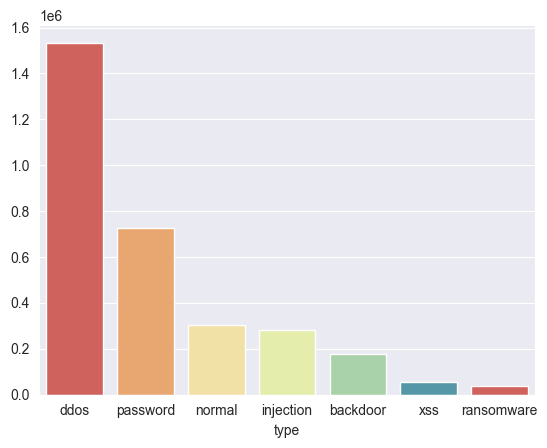

In [68]:
palette = sb.color_palette('Spectral')
sb.barplot(y=merged_df['type'].value_counts().values, x=merged_df['type'].value_counts().index, palette=palette)

<Axes: title={'center': 'Attack Type Distribution'}>

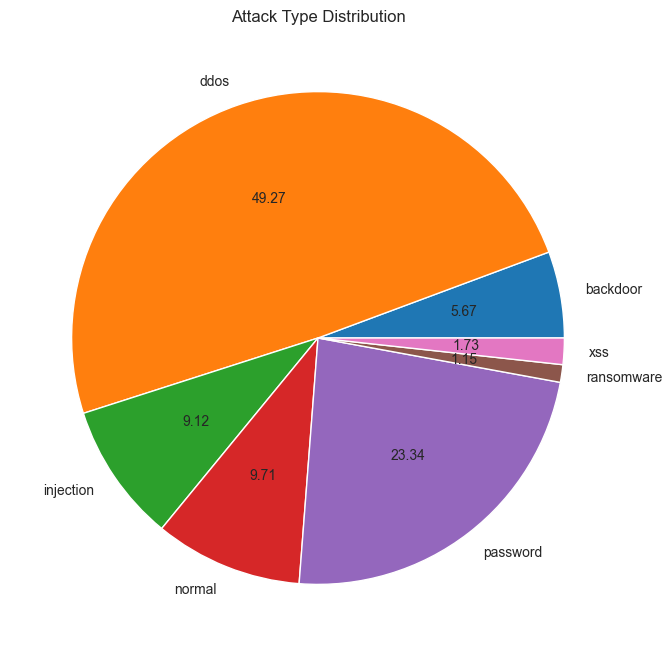

In [69]:
# Show the targets distribution
plt.title("Attack Type Distribution")
merged_df.groupby('type').size().plot(kind='pie', autopct='%.2f', figsize=(8,8))

In [70]:
print(f"Datasets Length: \nWeather: {len(df_weather)}\nNetworks: {len(df_networks)}\nMerged: {len(merged_df)}")

Datasets Length: 
Weather: 650242
Networks: 21978631
Merged: 3112833


In [71]:
# Drop datetime and type, the IP address contains IPv4 and IPv6 and cannot be simply converted into numbers, so they are also deleted.
merged_df.drop(['date', 'type', 'src_ip', 'dst_ip'], axis=1, inplace=True)
merged_df.rename(columns={'label_y': 'target'}, inplace=True)
merged_df

,temperature,pressure,humidity,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,target
303022,42.284067,0.652519,46.438572,41303.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303028,42.072715,0.223474,46.438572,35073.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303040,41.082517,0.329780,39.293462,47335.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303046,40.790088,0.329780,39.293462,32941.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303051,41.704988,0.329780,39.293462,5353.0,5353.0,udp,dns,0.0,0.0,0.0,S0,1.0,77.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559569,40.143201,8.721758,93.094490,33919.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
3559573,48.713096,-0.375782,22.799572,42781.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
3559580,46.847155,-6.117010,28.146511,34067.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
3559581,24.745123,0.913648,35.466818,34067.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0


In [72]:
# Encode target labels with integer value
le = LabelEncoder()
string_columns = ['proto', 'service', 'conn_state']
for col in string_columns:
    merged_df[col] = le.fit_transform(merged_df[col])

# Normalize the numeric columns
scaler = StandardScaler()
numeric_columns = ['temperature', 'pressure', 'humidity', 'src_port', 'dst_port', 
                     'duration', 'src_bytes', 'dst_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes']
merged_df[numeric_columns] = scaler.fit_transform(merged_df[numeric_columns])
merged_df[numeric_columns] = merged_df[numeric_columns].round(4)  # Keep 4 decimal place
merged_df['target'] = merged_df['target'].astype(int)
merged_df

,temperature,pressure,humidity,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,target
303022,0.6297,-0.0010,-0.0341,-0.4205,1.9692,2,0,-0.0963,-0.0337,-0.0276,6,-0.0058,-0.0068,-0.0148,-0.0141,0
303028,0.6024,-0.0597,-0.0341,-0.9741,1.9692,2,0,-0.0963,-0.0337,-0.0276,6,-0.0058,-0.0068,-0.0148,-0.0141,0
303040,0.4744,-0.0451,-0.2978,0.1155,1.9692,2,0,-0.0963,-0.0337,-0.0276,6,-0.0058,-0.0068,-0.0148,-0.0141,0
303046,0.4367,-0.0451,-0.2978,-1.1636,1.9692,2,0,-0.0963,-0.0337,-0.0276,6,-0.0058,-0.0068,-0.0148,-0.0141,0
303051,0.5549,-0.0451,-0.2978,-3.6150,0.4996,2,3,-0.0963,-0.0337,-0.0276,6,-0.0058,-0.0067,-0.0148,-0.0141,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559569,0.3531,1.1029,1.6875,-1.0767,1.9692,2,0,-0.0963,-0.0337,-0.0276,6,-0.0058,-0.0068,-0.0148,-0.0141,0
3559573,1.4601,-0.1417,-0.9064,-0.2892,1.9692,2,0,-0.0963,-0.0337,-0.0276,6,-0.0058,-0.0068,-0.0148,-0.0141,0
3559580,1.2191,-0.9271,-0.7091,-1.0635,1.9692,2,0,-0.0963,-0.0337,-0.0276,6,-0.0058,-0.0068,-0.0148,-0.0141,0
3559581,-1.6360,0.0347,-0.4390,-1.0635,1.9692,2,0,-0.0963,-0.0337,-0.0276,6,-0.0058,-0.0068,-0.0148,-0.0141,0


In [73]:
# Shuffle the dataset
dataset = merged_df.sample(frac=1).reset_index(drop=True)
dataset

,temperature,pressure,humidity,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,target
0,-0.9512,-1.3397,-0.1822,-0.8363,-0.2046,1,0,0.3172,-0.0337,-0.0276,9,-0.0038,-0.0059,-0.0087,-0.0128,1
1,-1.3359,-1.3589,0.5511,0.6965,-0.2566,1,0,-0.0963,-0.0337,-0.0276,1,-0.0058,-0.0070,-0.0118,-0.0136,1
2,0.8484,-0.3373,0.4952,-0.8925,4.7810,1,0,-0.0963,-0.0337,-0.0276,1,-0.0058,-0.0069,-0.0118,-0.0136,1
3,1.0525,0.4569,0.9922,-0.3257,-0.2566,1,7,-0.0933,-0.0337,-0.0276,10,-0.0007,-0.0027,0.0005,-0.0067,1
4,-0.1254,-0.8104,0.1599,-1.0499,-0.2566,1,7,-0.0963,-0.0337,-0.0275,10,-0.0017,-0.0035,0.0036,0.0206,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112828,-1.3021,0.9647,-1.1252,1.0845,-0.2651,1,0,-0.0963,-0.0337,-0.0276,1,-0.0058,-0.0069,-0.0118,-0.0136,1
3112829,0.2746,-0.0826,-0.9236,0.8055,-0.2566,1,7,-0.0962,-0.0337,-0.0276,10,-0.0007,-0.0026,-0.0026,-0.0105,1
3112830,-0.4156,-0.4059,0.7314,-0.4032,-0.2566,1,7,-0.0963,-0.0337,-0.0276,10,-0.0017,-0.0036,0.0005,-0.0041,1
3112831,1.0808,0.0692,0.1516,1.2555,0.8907,1,0,-0.0963,-0.0337,-0.0276,1,-0.0058,-0.0070,-0.0118,-0.0136,1


In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112833 entries, 0 to 3112832
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   temperature   float64
 1   pressure      float64
 2   humidity      float64
 3   src_port      float64
 4   dst_port      float64
 5   proto         int32  
 6   service       int32  
 7   duration      float64
 8   src_bytes     float64
 9   dst_bytes     float64
 10  conn_state    int32  
 11  src_pkts      float64
 12  src_ip_bytes  float64
 13  dst_pkts      float64
 14  dst_ip_bytes  float64
 15  target        int32  
dtypes: float64(12), int32(4)
memory usage: 332.5 MB


In [75]:
dataset.describe()

,temperature,pressure,humidity,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,target
count,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06
mean,-2.468491e-07,-5.497886e-07,-5.467046e-07,3.916047e-07,-3.869980e-06,1.104665e+00,2.714543e+00,-1.067593e-05,2.790191e-06,-3.357424e-06,7.738986e+00,3.083461e-06,-3.789056e-06,-3.964395e-06,1.321754e-06,9.028730e-01
std,1.000000e+00,1.000000e+00,1.000000e+00,9.999988e-01,9.999987e-01,3.142184e-01,3.527319e+00,1.000001e+00,1.000000e+00,1.000000e+00,3.352511e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.961306e-01
min,-2.182700e+00,-5.238400e+00,-1.737400e+00,-4.090600e+00,-2.681000e-01,0.000000e+00,0.000000e+00,-9.630000e-02,-3.370000e-02,-2.760000e-02,0.000000e+00,-6.800000e-03,-7.400000e-03,-1.480000e-02,-1.410000e-02,0.000000e+00
25%,-7.350000e-01,-5.820000e-01,-8.651000e-01,-5.690000e-01,-2.566000e-01,1.000000e+00,0.000000e+00,-9.630000e-02,-3.370000e-02,-2.760000e-02,7.000000e+00,-5.800000e-03,-6.800000e-03,-1.180000e-02,-1.340000e-02,1.000000e+00
50%,1.492000e-01,3.750000e-02,-4.160000e-02,9.520000e-02,-2.566000e-01,1.000000e+00,0.000000e+00,-9.620000e-02,-3.370000e-02,-2.760000e-02,9.000000e+00,-3.800000e-03,-5.900000e-03,-8.700000e-03,-1.280000e-02,1.000000e+00
75%,8.028000e-01,5.374000e-01,8.281000e-01,7.376000e-01,-2.046000e-01,1.000000e+00,7.000000e+00,-8.120000e-02,-3.370000e-02,-2.760000e-02,1.000000e+01,-1.700000e-03,-3.600000e-03,5.000000e-04,-5.300000e-03,1.000000e+00
max,1.559400e+00,3.560400e+00,1.938300e+00,1.732600e+00,9.130600e+00,2.000000e+00,1.100000e+01,6.381719e+02,7.866500e+01,1.050005e+02,1.200000e+01,1.183697e+03,1.004451e+03,5.352659e+02,1.439334e+03,1.000000e+00


In [76]:
# Export the dataset
dataset.to_csv("./merged_data.csv", index=False, header=True)

In [77]:
dataset['target'].value_counts()

target
1    2810493
0     302340
Name: count, dtype: int64

<Axes: title={'center': 'Labels Distribution'}>

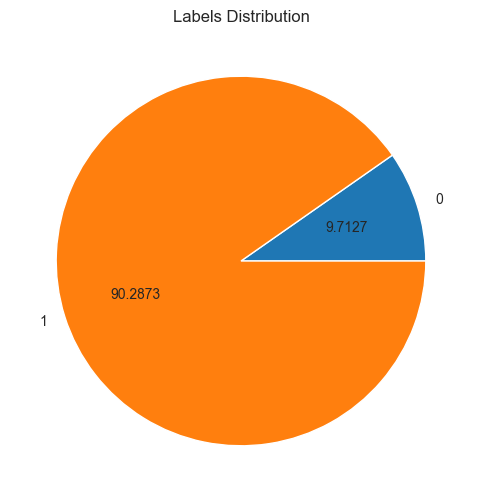

In [78]:
plt.title("Labels Distribution")
dataset.groupby('target').size().plot(kind='pie', autopct='%.4f', figsize=(6,6))

<Axes: xlabel='target'>

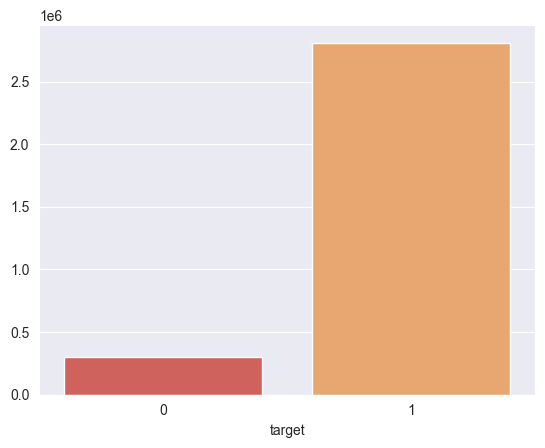

In [79]:
palette = sb.color_palette('Spectral')
sb.barplot(y=dataset['target'].value_counts().values, x=dataset['target'].value_counts().index, palette=palette)